# Exploratory data analysis on IPL 

# BY -MAYUR H K 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline


In [3]:
matches = pd.read_csv(r"C:\Users\admin\Downloads\matches.csv",delimiter =',',index_col = 0)
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 1 to 11415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   date             756 non-null    object
 3   team1            756 non-null    object
 4   team2            756 non-null    object
 5   toss_winner      756 non-null    object
 6   toss_decision    756 non-null    object
 7   result           756 non-null    object
 8   dl_applied       756 non-null    int64 
 9   winner           752 non-null    object
 10  win_by_runs      756 non-null    int64 
 11  win_by_wickets   756 non-null    int64 
 12  player_of_match  752 non-null    object
 13  venue            756 non-null    object
 14  umpire1          754 non-null    object
 15  umpire2          754 non-null    object
 16  umpire3          119 non-null    object
dtypes: int64(4), object(13)
memory us

In [5]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
matches = matches.drop("umpire3" ,axis = 1)

In [7]:
matches.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [8]:
matches.shape

(756, 16)

In [9]:
len(matches['season'].unique())

12

In [10]:
pd.concat([matches['team1'],matches['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

# Number of matches in each season

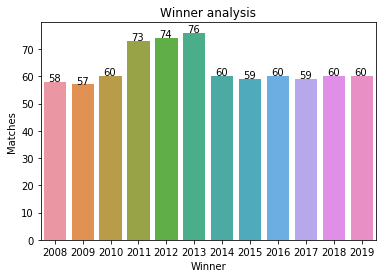

<Figure size 1008x576 with 0 Axes>

In [11]:
ax = sns.countplot(x='season',data = matches)
plt.xlabel('Winner')
plt.ylabel('Matches')
plt.title('Winner analysis')
plt.figure(figsize=(14,8))
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
plt.show()

# Win by runs and Win by wickets

In [12]:
win_max = matches.groupby(['winner'],as_index = False)['win_by_runs'].max()

Text(0.5, 1.0, 'Winner by runs')

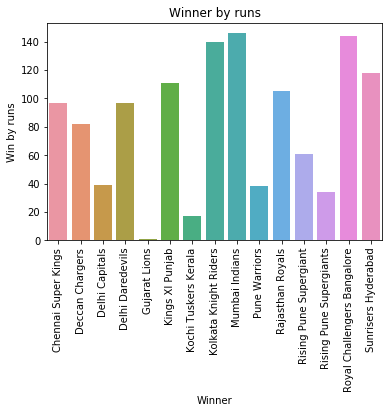

In [13]:
sns.barplot(win_max['winner'],win_max['win_by_runs'])
plt.xticks(rotation = 90)
plt.xlabel('Winner')
plt.ylabel('Win by runs')
plt.title('Winner by runs')

In [14]:
win_by_wickets = matches.groupby(['winner'],as_index = False)['win_by_wickets'].max()

Text(0.5, 1.0, 'Winner by wickets')

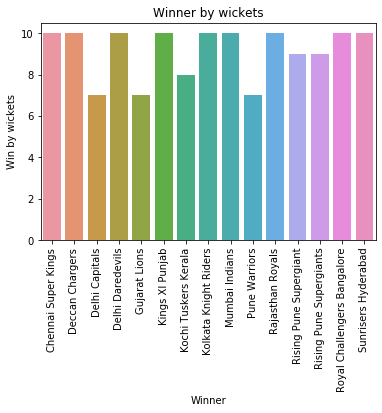

In [15]:
sns.barplot(win_max['winner'],win_by_wickets['win_by_wickets'])
plt.xticks(rotation = 90)
plt.xlabel('Winner')
plt.ylabel('Win by wickets')
plt.title('Winner by wickets')

# Vizualising the matches and venues

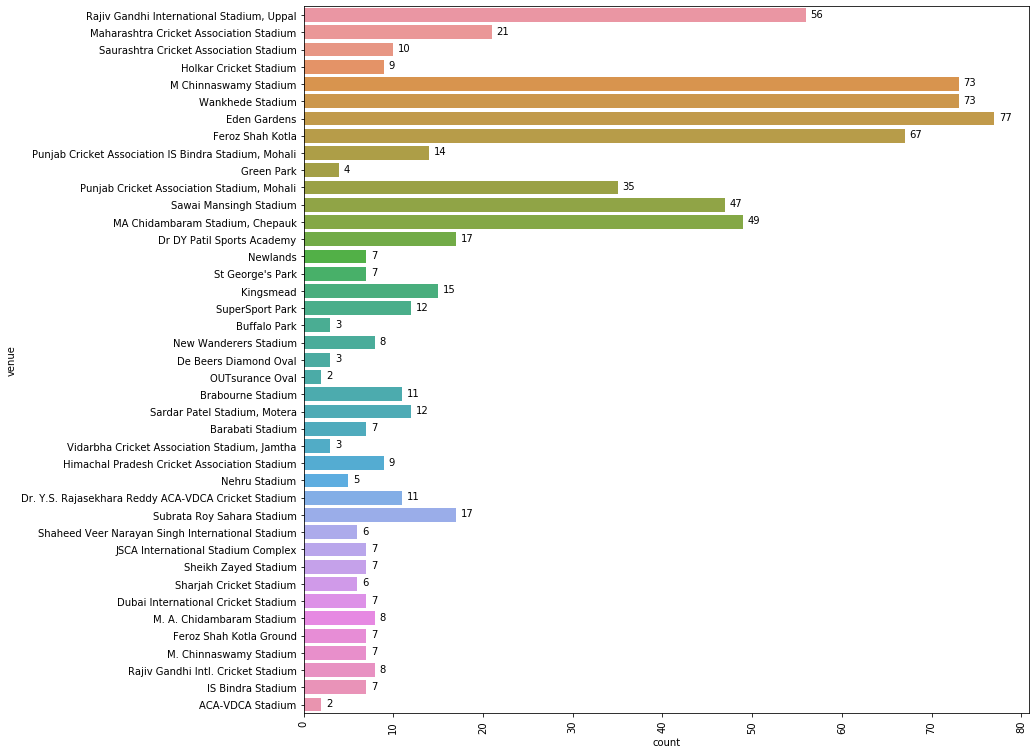

In [16]:
plt.figure(figsize= (13,13))
ax1 = sns.countplot(y = 'venue',data = matches)
plt.xticks(rotation = 90)
for p in ax1.patches:
    ax1.annotate(format(p.get_width()),(p.get_width()+0.5,p.get_y()+0.5))
plt.show()

# Most tosses and matches win by a team

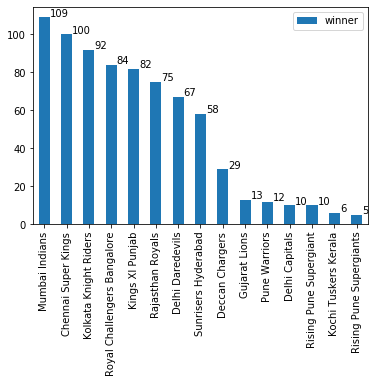

In [17]:
indi_wins = matches.winner.value_counts()
ax2 = indi_wins.plot(kind = 'bar',legend = True)
for p in ax2.patches:
    ax2.annotate(format(p.get_height()),(p.get_x()+0.5,p.get_height()+0.5))
plt.show()


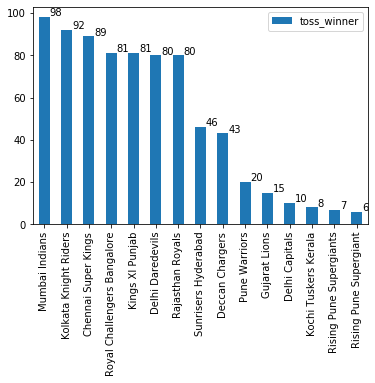

In [18]:
toss_wins = matches.toss_winner.value_counts()
ax = toss_wins.plot(kind = 'bar',legend = True)
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.5,p.get_height()+0.5))
plt.show()

# Player of the match Analysis

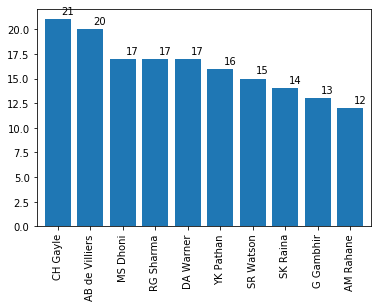

In [19]:
ax3 = matches['player_of_match'].value_counts().head(10).plot.bar(width = 0.8)
for p in ax3.patches:
    ax3.annotate(format(p.get_height()),(p.get_x()+0.5,p.get_height()+0.5))
plt.show()

# Plotting the number of seasons played in different cities

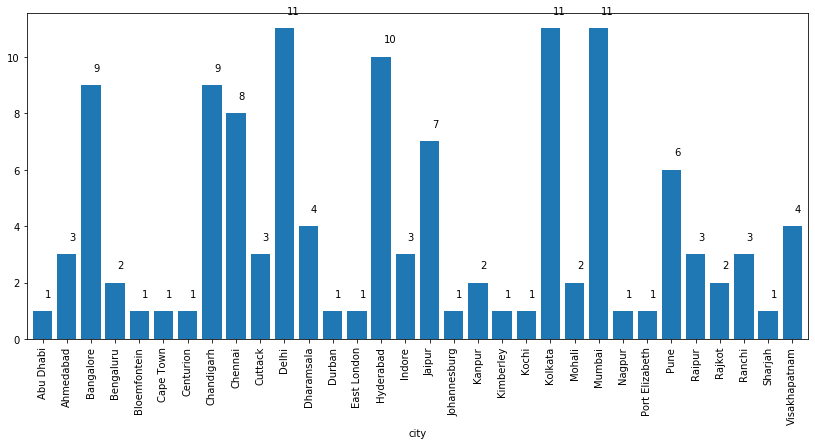

In [52]:
plt.figure(figsize=(14,6))
ax4 = matches.groupby('city')['season'].nunique().plot.bar(width = 0.8)
for p in ax4.patches:
    ax4.annotate(format(p.get_height()),(p.get_x()+0.5,p.get_height()+0.5))
plt.show()

# No. of winners in different cities

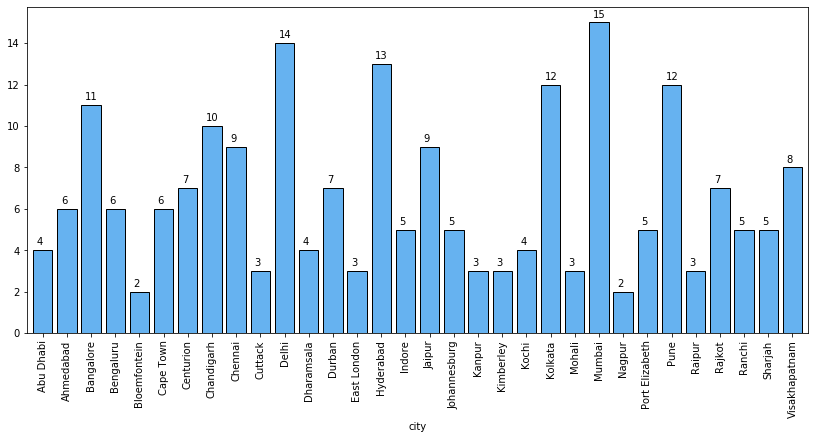

In [53]:
plt.figure(figsize=(14,6))
ax6=matches.groupby('city')['winner'].nunique().plot.bar(width=0.8,color=(0, 0.5, 0.9, 0.6),edgecolor='black')
for p in ax6.patches:
    ax6.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()


# Toss Win and Match Win

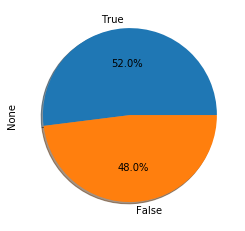

In [21]:
wins = matches['toss_winner'] == matches['winner']
ax4 = wins.value_counts().plot(kind ='pie',autopct = '%1.1f%%', shadow = 'True')

# Toss decision per season

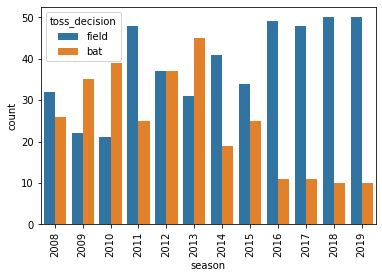

In [22]:
sns.countplot(x = 'season',hue = "toss_decision",data = matches)
plt.xticks(rotation = 90)
plt.show()

# Winners of each season

In [23]:
winner_season = matches.drop_duplicates(subset=['season'],keep = 'last')[['season','winner']].reset_index(drop=True)
winner_season

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [24]:
deli = pd.read_csv(r"C:\Users\admin\Downloads\deliveries.csv",delimiter =',',index_col = 0)
deli.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# No of overs played by batsman

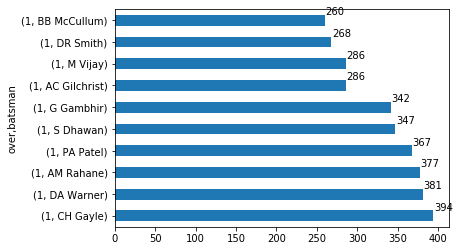

In [25]:
 as1= deli.groupby('over')['batsman'].value_counts().head(10).plot.barh()
for p in as1.patches:
    as1.annotate(format(p.get_width()),(p.get_width()+0.5,p.get_y()+0.5))
plt.show()

In [26]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 1 to 11415
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   inning            179078 non-null  int64 
 1   batting_team      179078 non-null  object
 2   bowling_team      179078 non-null  object
 3   over              179078 non-null  int64 
 4   ball              179078 non-null  int64 
 5   batsman           179078 non-null  object
 6   non_striker       179078 non-null  object
 7   bowler            179078 non-null  object
 8   is_super_over     179078 non-null  int64 
 9   wide_runs         179078 non-null  int64 
 10  bye_runs          179078 non-null  int64 
 11  legbye_runs       179078 non-null  int64 
 12  noball_runs       179078 non-null  int64 
 13  penalty_runs      179078 non-null  int64 
 14  batsman_runs      179078 non-null  int64 
 15  extra_runs        179078 non-null  int64 
 16  total_runs        179078 non-null  int6

# No of overs bowled by bowlers

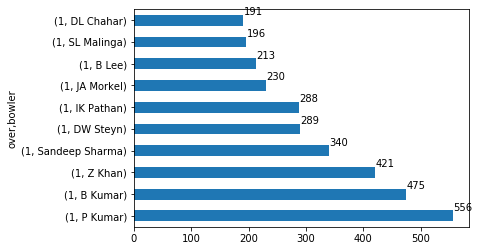

In [27]:
as2 = deli.groupby('over')['bowler'].value_counts().head(10).plot.barh()
for p in as2.patches:
    as2.annotate(format(p.get_width()),(p.get_width()+0.5,p.get_y()+0.5))
plt.show()

In [28]:
deli.describe()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [29]:
deli['batsman_runs'].value_counts()

0    70845
1    67523
4    20392
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64

In [31]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# Players with the Most Fours

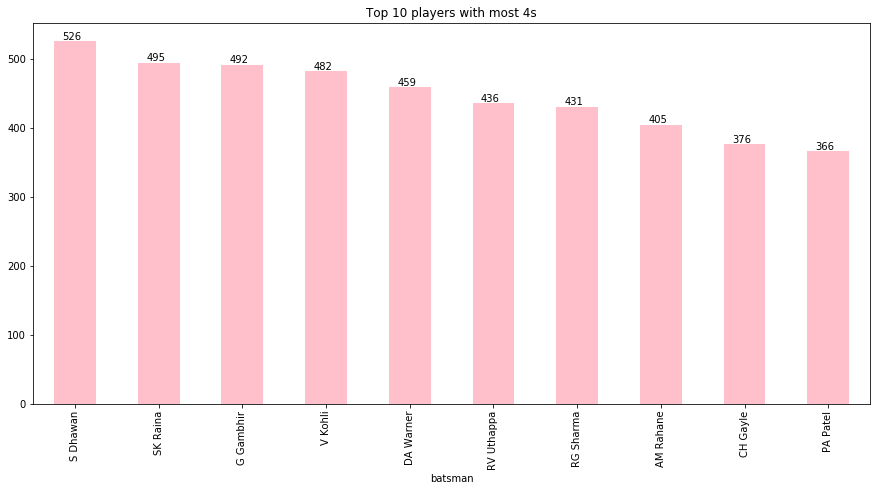

In [38]:
ax12=deli[deli["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Top 10 players with most 4s", figsize=(15,7), color="pink")
for p in ax12.patches:
    ax12.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

# Players with the Most Sixes

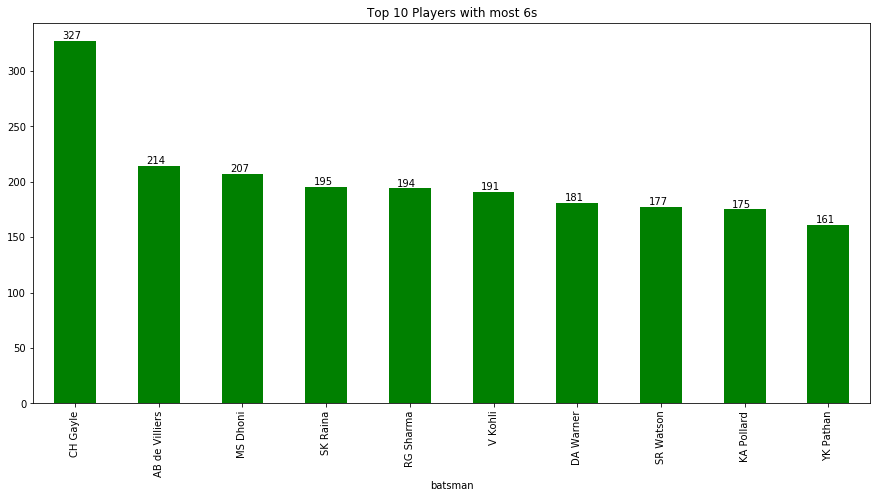

In [39]:
ax13=deli[deli["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Top 10 Players with most 6s", figsize=(15,7), color="green")
for p in ax13.patches:
    ax13.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.show()

In [41]:
batsman_runs=deli.groupby("batsman")["batsman_runs"].count().sort_values(ascending = False)
club2000=batsman_runs.where(batsman_runs >= 2000).dropna()
club2000

batsman
V Kohli           4211.0
SK Raina          4044.0
RG Sharma         3816.0
S Dhawan          3776.0
G Gambhir         3524.0
RV Uthappa        3492.0
DA Warner         3398.0
MS Dhoni          3318.0
AM Rahane         3215.0
CH Gayle          3131.0
AB de Villiers    2977.0
KD Karthik        2890.0
AT Rayudu         2681.0
SR Watson         2639.0
PA Patel          2444.0
MK Pandey         2425.0
YK Pathan         2334.0
JH Kallis         2291.0
BB McCullum       2272.0
Yuvraj Singh      2207.0
M Vijay           2164.0
SR Tendulkar      2044.0
Name: batsman_runs, dtype: float64

# 2000 runs club

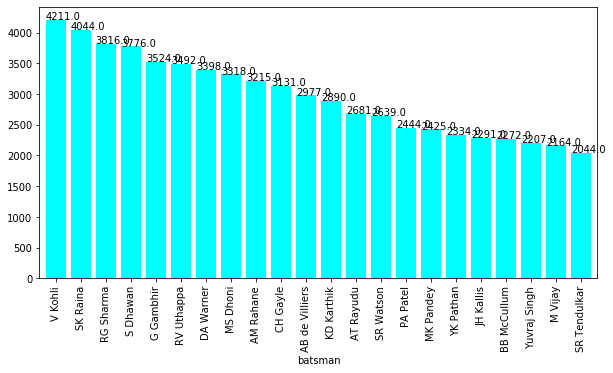

In [45]:
plt.subplots(figsize=(10,5))
ax=club2000.plot.bar(width=0.8,color='cyan')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+5))
plt.show()

# Batting summary

In [49]:
batsmen_summary = deli.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen_summary.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen_summary = batsmen_summary.sort_values(['balls','runs'], ascending=False)
batsmen_summary.head(10)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


# Strike rate

In [50]:
batsmen_summary['batting_strike_rate'] = batsmen_summary['runs']/batsmen_summary['balls'] * 100
batsmen_summary['batting_strike_rate'] = batsmen_summary['batting_strike_rate'].round(2)
batsmen_summary.head(10)


,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75
